In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import time

In [2]:
#Load nisptools functions

from nisptools.io import read_focalplane_from_fits
from nisptools.plot import plot_focalplane, plot_detector

In [3]:
#Set default parameters

NPIX = 2048
OFFSET = 1024
scaling_factor = np.array ([1./((4.-1.)*(16.+4.)),
                            1./((15.-1.)*(16.+11.))])

In [4]:
#Read focal plane from fits file

nl_av =  read_focalplane_from_fits ("NL_DARK" + "_Average.fits", 
                                    mode = ['SENGDARK'])

In [5]:
#Apply correction to data (depends on data)

nl_av = (nl_av - OFFSET) * scaling_factor [1]

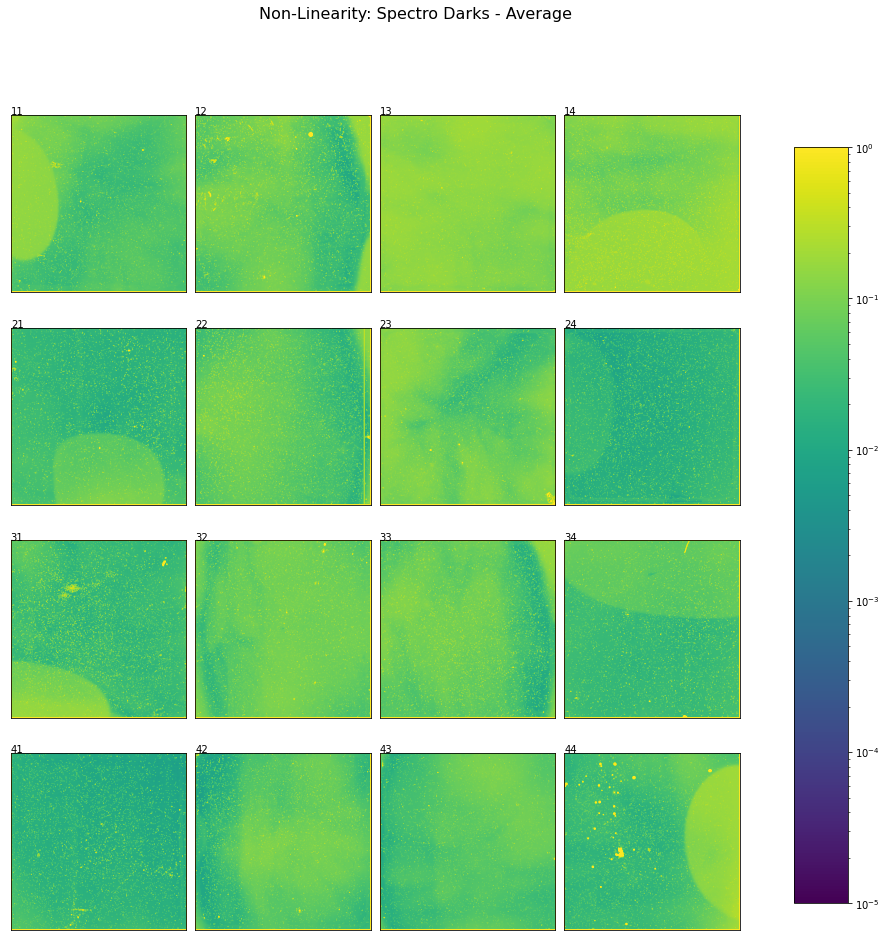

In [10]:
#Plot full focal plane

'''
Optional flags with default:

cmap='viridis'
aspect='auto'
scale='LOG'       Can be 'LIN' or 'LOG'
vmin = 1e-5
vmax = 1.
savefig=False
outname = "NONE"
'''

plot_focalplane (np.abs(nl_av), title = "Non-Linearity: Spectro Darks - Average", savefig=True,outname="focalplanetest.pdf")

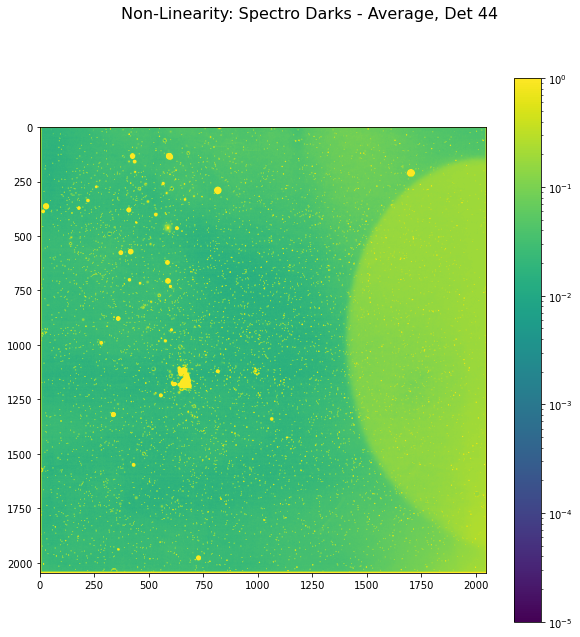

In [8]:
#Plot specific detector with zoomed area


'''
Optional flags with default same as before, plus:

extents = [-1,-1,-1,-1]  <---  Which pixel window to show, if default show the full detector

'''


det_id = '44'
plot_detector (np.abs(nl_av), det_id, title = "Non-Linearity: Spectro Darks - Average, Det " + det_id, aspect=None)

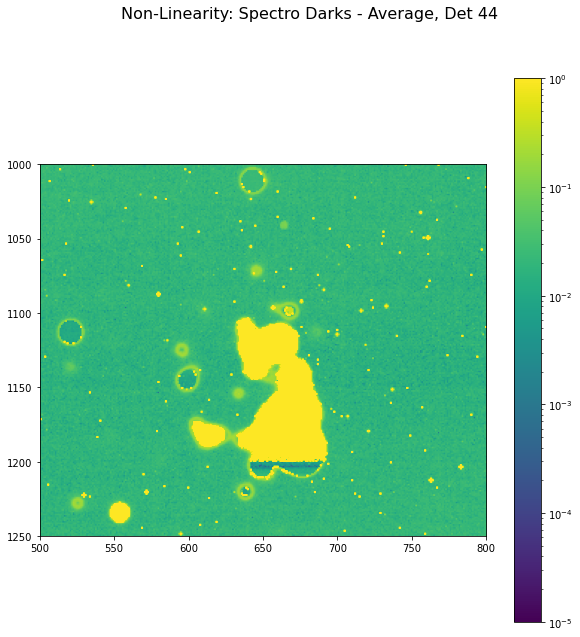

In [9]:
#Plot specific detector with zoomed area
det_id = '44'
row_i = 1000
row_e = 1250
col_i = 500
col_e = 800
ext = [col_i, col_e, row_e, row_i]
plot_detector (np.abs(nl_av), det_id, extents = ext, title = "Non-Linearity: Spectro Darks - Average, Det " + det_id, aspect=None)